### Playing with [MourvanZhou's evolutionary algorithm code](https://github.com/MorvanZhou/Evolutionary-Algorithm/blob/master/tutorial-contents/Genetic%20Algorithm/Genetic%20Algorithm%20Basic.py) ###

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds

def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function

# find non-zero fitness for selection
def get_fitness(pred): return pred + 1e-3 - np.min(pred)

# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# nature selection wrt pop's fitness
def select(pop, fitness):    
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/fitness.sum())
    return pop[idx]

# mating process (genes crossover)
def crossover(parent, pop):     
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent

def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA


#plt.ion()       # something about plotting
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))


for _ in range(N_GENERATIONS):
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA
    
    # something about plotting
    #if 'sca' in globals(): sca.remove()
    sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)
    plt.xlim(0, 5);
    plt.ylim(-10, 7.5);
    # GA part (evolution)
    fitness = get_fitness(F_values)
    #print("Most fitted DNA: ", translateDNA(pop[np.argmax(fitness), :]))
    print(max(fitness))
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child

#plt.ioff()
plt.show()

### Plotting squashed entanglement with the trivial squashing channel for the amplitude damping channel  [(See Keneth et al. 2016)](https://arxiv.org/pdf/1511.08710.pdf) ###

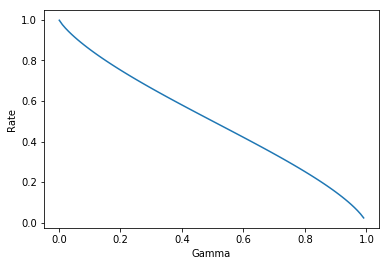

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from math import log2  # log2 requires Python 3.4 or higher

def h(x):   #binary entropy
    return -x*log2(x) - (1-x)*log2(1-x);

Rate = []
for g in np.arange(0.001,1,0.01):

    def CE_tmp(p): 
        gamma = g;
        if p >= 1 or p <= 0:
            return 1/(h(0.5) + h((1-gamma)*0.5) - h(gamma*0.5));  #handling out of domain inputs
        else:
            return 1/(h(p) + h((1-gamma)*p) - h(gamma*p));

    def CE():   #entanglement assisted classical capacity of the amplitude damping channel
        res = minimize(CE_tmp, np.array([0.5]), method='nelder-mead', 
                       options={'xtol': 1e-8, 'disp': False});
        return 1/res.fun;
    

    Rate.append(0.5 * CE())

plt.plot(np.arange(0.001,1,0.01), Rate)
plt.ylabel('Rate');
plt.xlabel('Gamma');

### Playing with QuTip ###

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

Testing the installation

In [2]:
import qutip.testing as qt
qt.run()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.2.0
Numpy Version:      1.13.3
Scipy Version:      1.0.0
Cython Version:     0.27.3
Matplotlib Version: 2.1.2
Python Version:     3.5.4
Number of CPUs:     4
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Windows (AMD64)
Installation path:  C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip



DEBUG:qutip.logging_utils:Creating logger for qutip.control.grape with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.optimconfig with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.dynamics with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.dump with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.tslotcomp with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.fidcomp with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.propcomp with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.optimizer with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.pulsegen with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.loadparams with policy basic.
DEBUG:qutip.logging_utils:Creating logger for qutip.control.pulseoptim with policy basic.
Transform 2-level to eigenbasis

Qobj norm ... ok
Qobj permute ... ok
Qobj ket type ... ok
Qobj bra type ... ok
Qobj operator type ... ok
Qobj superoperator type ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that dag() preserves superrep. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok
Checks that binary ops preserve 'superrep'. ... ok


C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  sqrt(factorial(m) / factorial(n)) *
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\qutip\wigner.py:226: DeprecationWarning: `factorial` is d

wigner: compare wigner methods for random state vectors ... ok
Wigner: Compare Wigner fft and iterative for rand. ket ... ok
Wigner: Compare Wigner fft and iterative for rand. dm ... ok
Wigner: Compare Wigner clenshaw and iterative for rand. dm ... ok
Wigner: Compare Wigner sparse clenshaw and iterative for rand. dm ... ok

ERROR: td_brmesolve: passes all brmesolve tests
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\pyximport\pyximport.py", line 215, in load_module
    inplace=build_inplace, language_level=language_level)
  File "C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\pyximport\pyximport.py", line 191, in build_module
    reload_support=pyxargs.reload_support)
  File "C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\pyximport\pyxbuild.py", line 102, in pyx_to_dll
    dist.run_comma

Creating a state

In [12]:
zero = (basis(2,0) + basis(2,1)).unit()
rho = ket2dm(zero)
print(zero)
print(rho)
print(entropy_vn(rho))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.70710678]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0.5]
 [ 0.5  0.5]]
2.220446049250313e-16


### Squashed entanglement of a state ###

In [125]:
from qutip import *
from scipy import arcsin, sqrt, pi
import numpy as np
import scipy.sparse as sp
from qutip.qobj import Qobj
import matplotlib.pyplot as plt
import itertools

Defining some fuctions

In [139]:
#rhoABE is a tripartite density matrix with the third subsystem being the ancilla
def cond_entropy_mutual(rhoABE):  
    AE = rhoABE.ptrace([0, 2]);
    BE = rhoABE.ptrace([1, 2]);
    ABE = rhoABE;
    E = rhoABE.ptrace(2);
    return entropy_vn(AE,2) + entropy_vn(BE,2) - entropy_vn(ABE,2) - entropy_vn(E,2); 

#X and Y are lists of N^2 numbers between 0 and 1. N = 2 * 2 * E_dim. Each number in the lists will be represented as 
#a (length = DNA_Length) binary number between 0 and 2**DNA_Length-1 for the purposes of evolution, then divided by 
#2**DNA_length-1 before handing it to the following two functions. So that's a total of DNA_Length*2*N^2 bits.
def rand_herm_mod(N, X, Y, density=1, dims=None):      #this is a modified version of the rand_herm function from QuTip
    if dims:
        _check_dims(dims, N, N)
    # to get appropriate density of output
    # Hermitian operator must convert via:
    herm_density = 2.0 * arcsin(density) / pi

    X_int = sp.rand(N, N, herm_density, format='csr')
    X_int.data = np.array(X) - 0.5
    Y_int = X_int.copy()
    Y_int.data = 1.0j * np.array(Y) - (0.5 + 0.5j)
    X_int = X_int + Y_int
    X_int.sort_indices()
    X_int = Qobj(X_int)
    if dims:
        return Qobj((X_int + X_int.dag()) / 2.0, dims=dims, shape=[N, N])
    else:
        return Qobj((X_int + X_int.dag()) / 2.0)
    

def rand_unitary_mod(N, X, Y, density=1, dims=None):    #this is a modified version of the rand_unitary function from QuTip
    #if dims:
    #    _check_dims(dims, N, N)
    U = (-1.0j * rand_herm_mod(N, X, Y, density)).expm()
    U.data.sort_indices()
    if dims:
        return Qobj(U, dims=dims, shape=[N, N])
    else:
        return Qobj(U)


    
def _check_dims(dims, N1, N2):   #this function is taken directly from QuTip
    if len(dims) != 2:
        raise Exception("Qobj dimensions must be list of length 2.")
    if (not isinstance(dims[0], list)) or (not isinstance(dims[1], list)):
        raise TypeError(
            "Qobj dimension components must be lists. i.e. dims=[[N],[N]]")
    if np.prod(dims[0]) != N1 or np.prod(dims[1]) != N2:
        raise ValueError("Qobj dimensions must match matrix shape.")
    if len(dims[0]) != len(dims[1]):
        raise TypeError("Qobj dimension components must have same length.")

        
def bitlist2int(list_o_bits):  #By Martijn Pieters on Github
    out = 0
    for bit in list_o_bits:
        out = (out << 1) | bit
    return out;

More testing. Not yet the algorithm.

In [ ]:
#Variables
E_dim = 2;  #Dimension of the ancilla system

#Writing down the bi-partite system's density matrix.
rhoAB = rand_dm(4, 0.5, dims=[[2,2], [2,2]]);  #random bi-partite density matrix

#Adding the ancillary system
rhoE = ket2dm(basis(E_dim,0)); #|0...0><0...0|
rhoABE = tensor(rhoAB,rhoE);

min = 2;
for i in range(10):
    #Choose the channel unitary
    #U = tensor(identity(2), identity(2), identity(E_dim)); #Identity operator of tensored identities
    U = rand_unitary(2*2*E_dim, dims=[[2,2,E_dim], [2,2,E_dim]])

    #Apply a unitary on the rhoABE
    sigmaABE = U * rhoABE * U.dag();

    #Calculate the comdition mutual information. 
    #This will be the fitness fucntion for the genetic algorithm. The aim is to minimize it.
    cmi = cond_entropy_mutual(sigmaABE);
    if cmi<min:
        min = cmi

    print(min)


The adapted genetic algorithm. 
Each individual in the population is a list of two lists X and Y that seed a unitary.

In [141]:
#Note: each time you run this cell, rhoAB changes. It's random.
#Writing down the bi-partite system's density matrix.
rhoAB = rand_dm(4, 0.5, dims=[[2,2], [2,2]]);  #random bi-partite density matrix

0
1
2
3
4
5
6
7
8
9


C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
C:\Users\basse\Anaconda3\envs\qutip_for_genetic_algorithm\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


10
11
12
13
14


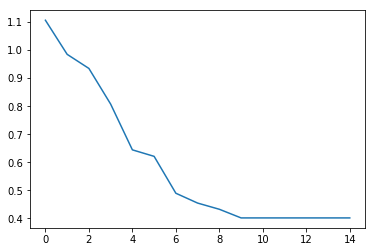

In [203]:
#Adding the ancillary system
E_dim = 2;  #Dimension of the ancilla system
rhoE = ket2dm(basis(E_dim,0)); #|0...0><0...0|
rhoABE = tensor(rhoAB,rhoE);

DNA_SIZE = 25           # DNA length   # size of each number in the lists X and Y
POP_SIZE = 100           # population size
CROSS_RATE = 1         # mating probability (DNA crossover)
MUTATION_RATE = 0.000    # mutation probability
N_GENERATIONS = 15
#X_BOUND = [0, 1]         # x upper and lower bounds. Modified: changed the bound


def F(U): return cond_entropy_mutual(U * rhoABE * U.dag());   #modified: out F is the conditional mutual information

# find non-zero fitness for selection
def get_fitness(pred): return 1/pred - 1/np.max(pred)  #modified: fitness is highest when cmi is lowest

# convert binary DNA to decimal and normalize it to a range(0, 1). Modified: takes unitary seeding list. returns a Unitary
def translateDNA(individual): # pop = [[[X0], [X1], ...  ,[XN^2]]], [[Y0], [Y1], ...  ,[YN^2]]]]   [X0] is a binary number stored in 
#list of.
    X = [bitlist2int(individual[0][i]) / (2**DNA_SIZE-1) for i in range(16*E_dim*E_dim)];
    Y = [bitlist2int(individual[1][i]) / (2**DNA_SIZE-1) for i in range(16*E_dim*E_dim)];
    return rand_unitary_mod(2*2*E_dim, X, Y, density=1, dims=[[2,2,E_dim], [2,2,E_dim]]);
    #return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# nature selection wrt pop's fitness. Not modified. Should work as it is.
def select(pop, fitness):    
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/fitness.sum())
    #print(idx)
    return [pop[i] for i in idx]

# mating process (genes crossover). Modified: conver each individual into one long list of bits, then convert it back
#once crossover is complete.
def crossover_and_mutate(individual, pop):
    long_individual = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(individual))));
    #crossover
    #if np.random.rand() < CROSS_RATE:
    i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
    cross_points = np.random.randint(0, 2, size=DNA_SIZE*2*16*E_dim*E_dim).astype(np.bool)   # choose crossover points
    long_pop_individual = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(pop[i_[0]]))))
    for point in cross_points:
        long_individual[point] = long_pop_individual[point];  # mating and produce one child
        
    #mutate
#    for i in range(len(long_individual)):
#        if np.random.rand() < MUTATION_RATE:
#            long_individual[i] = 1 if long_individual[i] == 0 else 0

    
    for i in range(2):
        for j in range(16*E_dim*E_dim):
            individual[i][j] = long_individual[i*int(len(long_individual)/2) : (i+1)*int(len(long_individual)/2)][
                j*DNA_SIZE:(j+1)*DNA_SIZE]
    return individual

#def mutate(child):
#    for point in range(DNA_SIZE):
#        if np.random.rand() < MUTATION_RATE:
#            child[point] = 1 if child[point] == 0 else 0
#    return child


#pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA. Modified: this should be a list of individuals
pop = [[[list(np.random.randint(2, size=(DNA_SIZE))) for j in range(16*E_dim*E_dim)] , 
       [list(np.random.randint(2, size=(DNA_SIZE))) for j in range(16*E_dim*E_dim)]] for i in range(POP_SIZE)] 

cmi_list = []
for _ in range(N_GENERATIONS):
    #F_values = F(translateDNA(pop))    # compute function value by extracting DNA
    F_values = [F(translateDNA(ind)) for ind in pop]
    cmi_list.append(max(F_values))
    print(_)
    # GA part (evolution)
    fitness = get_fitness(np.array(F_values))
    #print(max(fitness))
    #print("Highest fitness in generation ", _ ," is ", np.max(fitness))
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover_and_mutate(parent, pop_copy)
        #child = mutate(child)
        parent[:] = child       # parent is replaced by its child
plt.plot([i for i in range(N_GENERATIONS)], cmi_list)